In [1]:
# Step 2.1: Import Data & Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned monthly SKU data
monthly_data = pd.read_csv('all_sku_monthly.csv')

# Convert 'YearMonth' to datetime
monthly_data['YearMonth'] = pd.to_datetime(monthly_data['YearMonth'].astype(str))


Unique SKUs: 2935
Date Range: 2023-01-01 00:00:00 to 2025-03-01 00:00:00


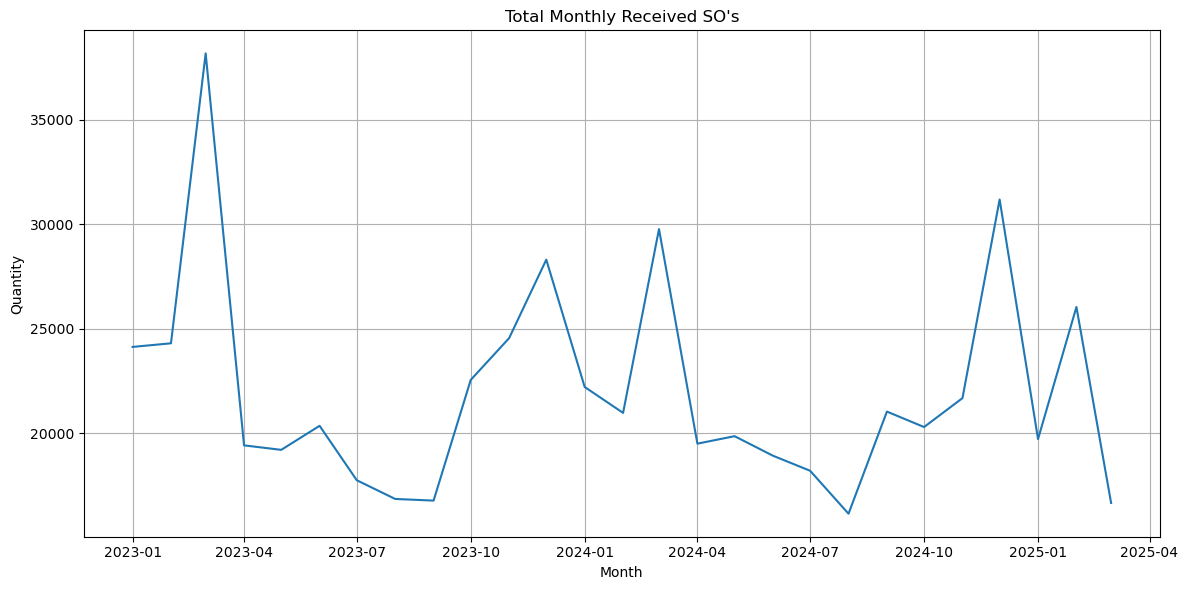

In [2]:
# Step 2.2: Overview of SKU Distribution
# Number of unique SKUs
print("Unique SKUs:", monthly_data['Item_ID'].nunique())

# Monthly time range
print("Date Range:", monthly_data['YearMonth'].min(), "to", monthly_data['YearMonth'].max())

# Plot: Monthly sales volume trend (Total)
monthly_trend = monthly_data.groupby('YearMonth')['Monthly_Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_trend, x='YearMonth', y='Monthly_Quantity')
plt.title("Total Monthly Received SO's")
plt.xlabel("Month")
plt.ylabel("Quantity")
plt.grid(True)

plt.tight_layout()
plt.savefig("monthly_so_trend.jpg", format='jpg', dpi=300)

plt.show()


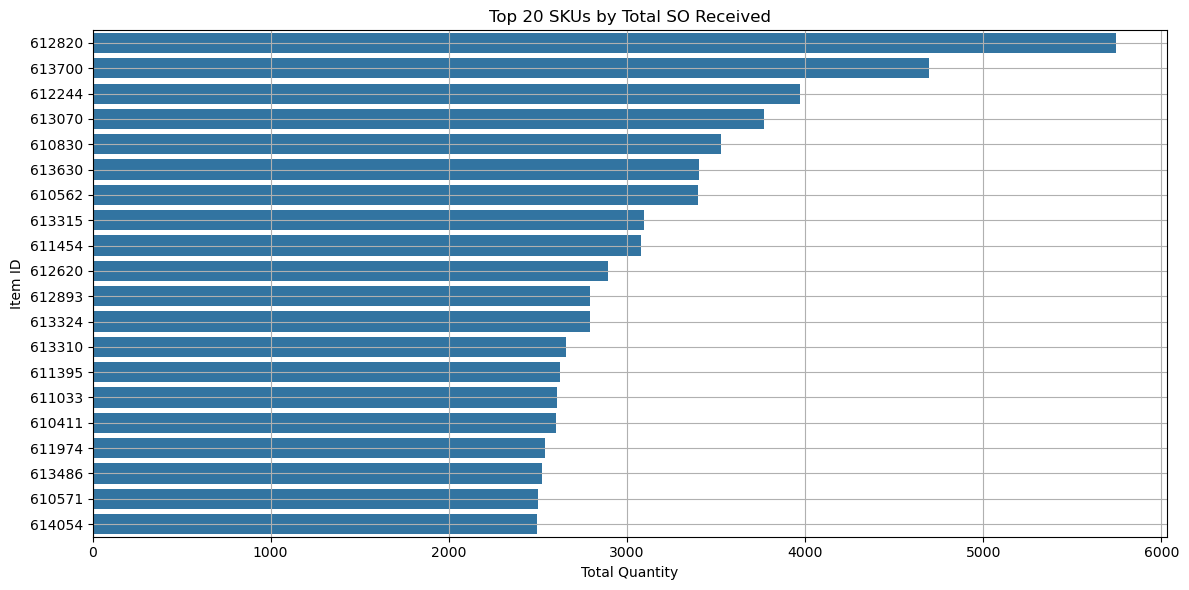

In [17]:
# Step 2.3: Sales Distribution by SKU
# Total sales per SKU
sku_totals = monthly_data.groupby('Item_ID')['Monthly_Quantity'].sum().sort_values(ascending=False)

# Convert index (Item_IDs) to string for better y-axis labels
top_20 = sku_totals.head(20)
top_20.index = top_20.index.astype(str)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_20.values, y=top_20.index)
plt.title("Top 20 SKUs by Total SO Received")
plt.xlabel("Total Quantity")
plt.ylabel("Item ID")
plt.grid(True)

plt.tight_layout()
plt.savefig("top20_skus_total_so.jpg", format='jpg', dpi=300)

plt.show()


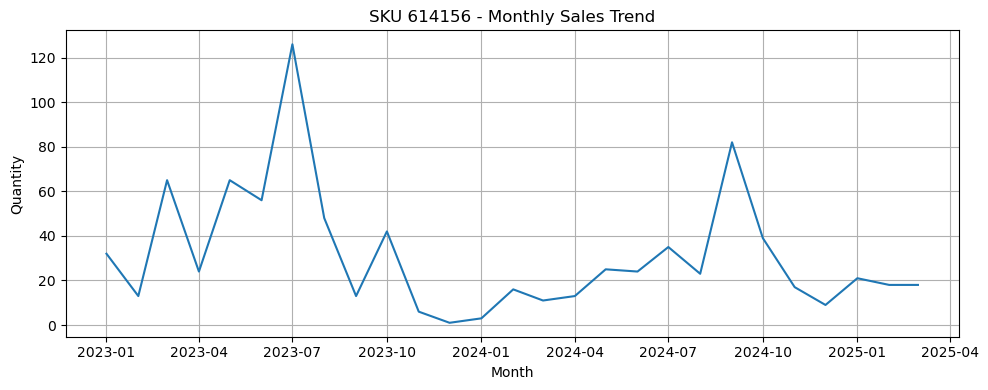

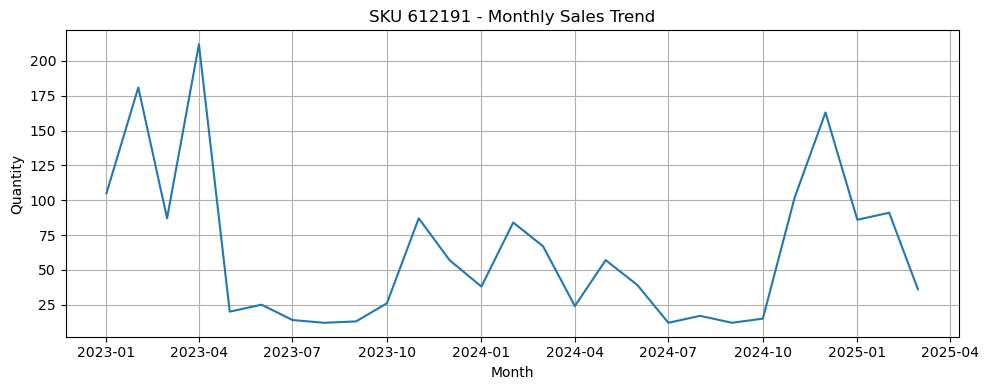

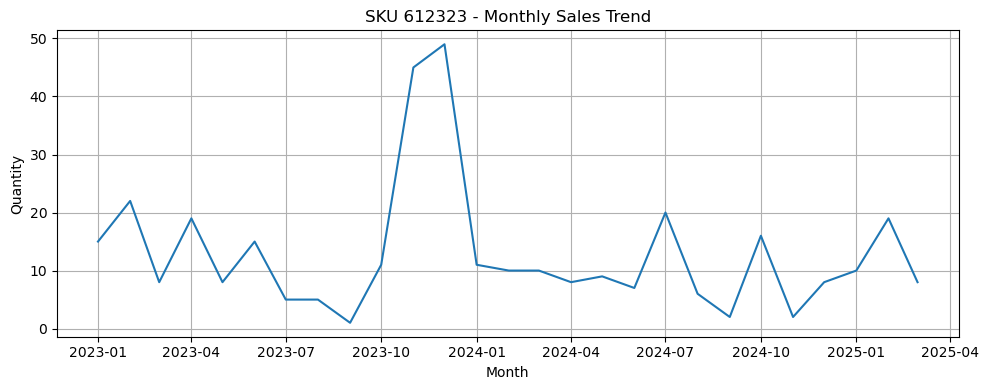

In [23]:
# Step 2.4: Individual SKU Seasonality Check
import os
export_folder = "sku_charts"
os.makedirs(export_folder, exist_ok=True)

sample_skus = monthly_data['Item_ID'].value_counts().head(3).index.tolist()

for sku in sample_skus:
    temp = monthly_data[monthly_data['Item_ID'] == sku]
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=temp, x='YearMonth', y='Monthly_Quantity')
    plt.title(f'SKU {sku} - Monthly Sales Trend')
    plt.xlabel("Month")
    plt.ylabel("Quantity")
    plt.grid(True)

# Export before showing
    filename = f"{export_folder}/sku_{sku}_sales_trend.jpg"
    plt.tight_layout()
    plt.savefig(filename, format='jpg', dpi=300)
    
    plt.show()